In [2]:
import numpy as np
import matplotlib.pyplot as plt


# D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
# X = np.array([-3, -2.9, -2.8, -2.65, 0, 0.75, 0,85, 0.9, 1.2, 1.25, 1.35, 1.4,  1.5, 2.25, 3.])
X = np.array(np.linspace(-3, 3, 10))
Y = np.array(X ** 2 + 2 * np.random.normal(0, 1, 10))
# D = np.array([X, y]).T

In [3]:
np.hstack([np.ones(len(D)).reshape((-1, 1)), D[:,:-1]])

array([[ 1.  , -3.  ],
       [ 1.  , -2.9 ],
       [ 1.  , -2.8 ],
       [ 1.  , -2.65],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.75],
       [ 1.  ,  0.  ],
       [ 1.  , 85.  ],
       [ 1.  ,  0.9 ],
       [ 1.  ,  1.2 ],
       [ 1.  ,  1.25],
       [ 1.  ,  1.35],
       [ 1.  ,  1.4 ],
       [ 1.  ,  1.5 ],
       [ 1.  ,  2.25],
       [ 1.  ,  3.  ]])

In [100]:
class MultipleRegression():
    
    def __init__(self, add_constant=True):
        self.w = None
        self.add_constant = add_constant
    
    def train(self, examples):
        x = examples[:,:-1]
        if self.add_constant:
            x = np.hstack([np.ones(len(x)).reshape((-1, 1)), x])
        y = examples[:,-1].reshape((-1, 1))
        self.w = np.linalg.inv(x.T @ x) @ x.T @ y
        return self
    
    def predict(self, x):
        if len(x.shape) == 1:
            x = x.reshape((-1, 1))
        if self.add_constant:
            x = np.hstack([np.ones(len(x)).reshape((-1, 1)), x])
        return (x @ self.w).flatten()

In [6]:
model = MultipleRegression().train(D)
model.w

array([[3.31034483],
       [0.43103448]])

In [104]:
from numpy.polynomial import Polynomial



# w = Polynomial.fit(X, Y, deg=1).convert()
# np.testing.assert_allclose(model.w.flatten(), w.coef)
# w

In [18]:
# x2 = np.array([X ** i for i in range(2)]).T
x2 = np.vstack([[X ** i for i in range(1, 7)], Y]).T
x2

array([[-3.00000000e+00,  9.00000000e+00, -2.70000000e+01,
         8.10000000e+01, -2.43000000e+02,  7.29000000e+02,
         1.01974213e+01],
       [-2.33333333e+00,  5.44444444e+00, -1.27037037e+01,
         2.96419753e+01, -6.91646091e+01,  1.61384088e+02,
         4.62253216e+00],
       [-1.66666667e+00,  2.77777778e+00, -4.62962963e+00,
         7.71604938e+00, -1.28600823e+01,  2.14334705e+01,
         2.43900701e+00],
       [-1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -2.63923864e-01],
       [-3.33333333e-01,  1.11111111e-01, -3.70370370e-02,
         1.23456790e-02, -4.11522634e-03,  1.37174211e-03,
         2.58061433e+00],
       [ 3.33333333e-01,  1.11111111e-01,  3.70370370e-02,
         1.23456790e-02,  4.11522634e-03,  1.37174211e-03,
         1.72531851e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         2.1244665

In [19]:
model2 = MultipleRegression().train(x2)
model2.w

array([[ 1.49741995],
       [ 1.15136415],
       [ 0.55569693],
       [-0.04247007],
       [ 0.06674511],
       [-0.01335563],
       [-0.003624  ]])

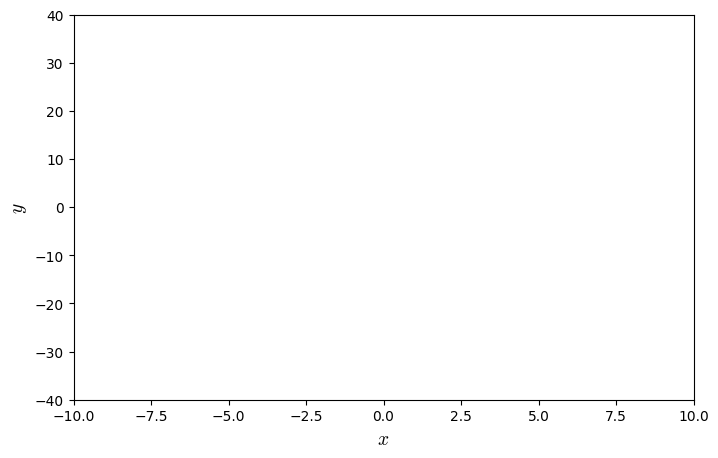

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.rcParams['mathtext.fontset'] = 'cm'

x_graph = np.linspace(-4.5, 4.5)
ax.scatter(X, Y, color='blue', label='Data')
ax.plot(x_graph, sum(model2.w[i] * x_graph ** i for i in range(0, 7)), color='red', label='Linear regression')

ax.set_xlim(-10, 10)
ax.set_ylim(-40, 40)

ax.set_xlabel(r'$x$', fontsize=14)  
ax.set_ylabel(r'$y$', fontsize=14)
plt.show()


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# pipeline = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
# pipeline.fit(X.reshape(-1, 1), Y)


In [39]:
w2 = np.hstack([np.array([pipeline[-1].intercept_]), pipeline[-1].coef_])

In [22]:
np.random.normal(0, 1, 10)

array([ 0.32439858, -0.22139636,  0.85843368,  0.96817632,  0.64011526,
        1.58577261,  2.51624401,  0.23582822,  0.41537963,  1.77817013])

In [21]:
np.random.seed(0)
X1 = np.array(np.linspace(-3, 1, 10))
y = np.array(X ** 2 + np.random.normal(0, 1, 10))

In [24]:
transformer = PolynomialFeatures(8, include_bias=True)
F = transformer.fit_transform(X.reshape(-1, 1))
F


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01,  8.10000000e+01, -2.43000000e+02,
         7.29000000e+02, -2.18700000e+03,  6.56100000e+03],
       [ 1.00000000e+00, -2.55555556e+00,  6.53086420e+00,
        -1.66899863e+01,  4.26521872e+01, -1.09000034e+02,
         2.78555642e+02, -7.11864419e+02,  1.81920907e+03],
       [ 1.00000000e+00, -2.11111111e+00,  4.45679012e+00,
        -9.40877915e+00,  1.98629782e+01, -4.19329540e+01,
         8.85251251e+01, -1.86886375e+02,  3.94537903e+02],
       [ 1.00000000e+00, -1.66666667e+00,  2.77777778e+00,
        -4.62962963e+00,  7.71604938e+00, -1.28600823e+01,
         2.14334705e+01, -3.57224508e+01,  5.95374181e+01],
       [ 1.00000000e+00, -1.22222222e+00,  1.49382716e+00,
        -1.82578875e+00,  2.23151959e+00, -2.72741283e+00,
         3.33350457e+00, -4.07428336e+00,  4.97967966e+00],
       [ 1.00000000e+00, -7.77777778e-01,  6.04938272e-01,
        -4.70507545e-01,  3.65950312e-01, -2.846280

In [17]:
y = Y.reshape(-1, 1)
y

array([[-0.06],
       [ 0.94],
       [ 0.97],
       [ 0.85],
       [ 0.25],
       [ 0.09],
       [-0.9 ],
       [-0.93],
       [-0.53],
       [ 0.08]])

In [18]:
w = np.linalg.inv(F.T @ F) @ F.T @ y
print(np.linalg.norm(w), w)

2.81922436022024 [[-1.00467521]
 [-0.03682694]
 [ 2.09307341]
 [-0.01150031]
 [-1.47427555]
 [-0.26793993]
 [ 0.4974123 ]
 [ 0.24977788]
 [ 0.03347738]]


[[ 75.   28. ]
 [ 88.   22.3]
 [160.   12. ]
 [ 63.   38. ]
 [ 67.   33.8]
 [ 90.   19.4]
 [ 60.   38.1]
 [ 67.   30. ]
 [ 95.   20. ]
 [ 88.   20. ]
 [ 60.   27. ]
 [180.   16.5]
 [ 88.   24.5]
 [150.   11. ]
 [155.   16.9]
 [ 75.   33.7]
 [115.   21.6]
 [150.   14. ]
 [ 90.   26. ]
 [ 90.   28.4]]


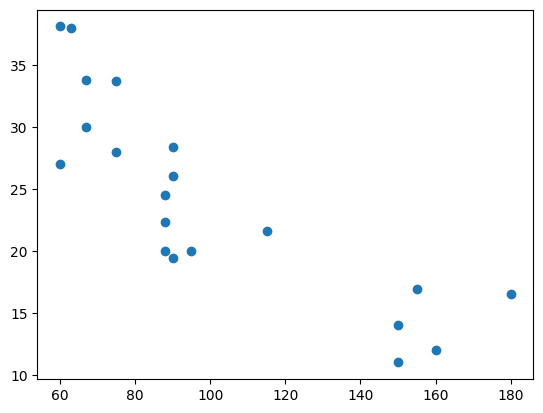

In [269]:
import seaborn as sns
df = sns.load_dataset('mpg')
# print(df.head())
df.dropna(inplace=True)
X = df[['horsepower', 'mpg']].sample(frac=0.05, random_state=0).values
print(X)
# X = X[X[['horsepower', 'mpg']] < 100].dropna().values
# # X = X.drop(X[2])
# print(X)


plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [272]:
x = np.array(X[:, 0])
y = np.array(X[:, 1])

np.set_printoptions(precision=3, linewidth=180)
for d in range(2, 10):
    tx = np.array([[x[i] ** j for j in range(d)] for i in range(len(x))])
    a = np.linalg.inv(tx.T @ tx) @ tx.T
    print(a.shape, y.shape)
    w = np.linalg.inv(tx.T @ tx) @ tx.T @ y
    print(f'次数：{d-1} |w|={np.linalg.norm(w):2f}, w = {w}')

tx = np.array([[x[i] ** j for j in range(9)] for i in range(len(x))])
px = PolynomialFeatures(8, include_bias=True).fit_transform(x.reshape(-1, 1))
# print(tx)
w = np.linalg.inv(tx.T @ tx) @ tx.T @ y
wp = np.linalg.inv(px.T @ px) @ px.T @ y
# print(np.linalg.norm(w), w)
# print(np.linalg.norm(wp), wp)

(2, 20) (20,)
次数：1 |w|=42.255407, w = [42.255 -0.181]
(3, 20) (20,)
次数：2 |w|=70.067936, w = [ 7.006e+01 -7.266e-01  2.356e-03]
(4, 20) (20,)
次数：3 |w|=64.687643, w = [ 6.469e+01 -5.657e-01  8.517e-04  4.393e-06]
(5, 20) (20,)
次数：4 |w|=86.537196, w = [ 8.653e+01 -1.422e+00  1.274e-02 -6.497e-05  1.446e-07]
(6, 20) (20,)
次数：5 |w|=541.440632, w = [-5.406e+02  2.964e+01 -5.800e-01  5.382e-03 -2.397e-05  4.124e-08]
(7, 20) (20,)
次数：6 |w|=2141.844597, w = [-2.138e+03  1.257e+02 -2.916e+00  3.480e-02 -2.263e-04  7.622e-07 -1.041e-09]
(8, 20) (20,)
次数：7 |w|=2952.727319, w = [-2.947e+03  1.818e+02 -4.544e+00  6.033e-02 -4.604e-04  2.018e-06 -4.698e-09  4.460e-12]
(9, 20) (20,)
次数：8 |w|=44502.304390, w = [ 4.435e+04 -3.695e+03  1.317e+02 -2.618e+00  3.176e-02 -2.408e-04  1.115e-06 -2.884e-09  3.195e-12]


(9,)


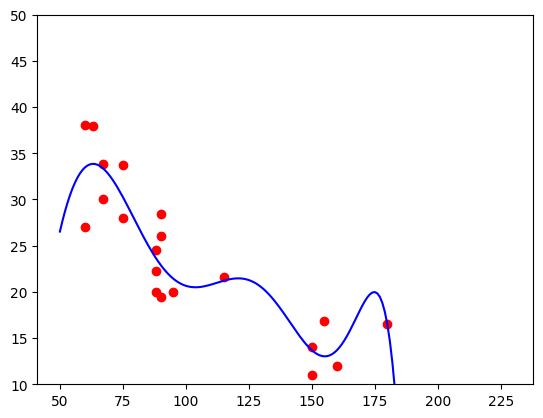

In [265]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(px, y)
# print(model.coef_)
graph = np.arange(50, 230).reshape(-1, 1)
g_ = PolynomialFeatures(8, include_bias=True).fit_transform(graph)
print(model.coef_.shape)
pred = model.predict(g_)
plt.scatter(x, y, c='r')
plt.plot(graph, pred, c='b')
plt.ylim(10, 50)
plt.show()

[ 4.435e+04 -3.695e+03  1.317e+02 -2.618e+00  3.176e-02 -2.408e-04  1.115e-06 -2.884e-09  3.195e-12]


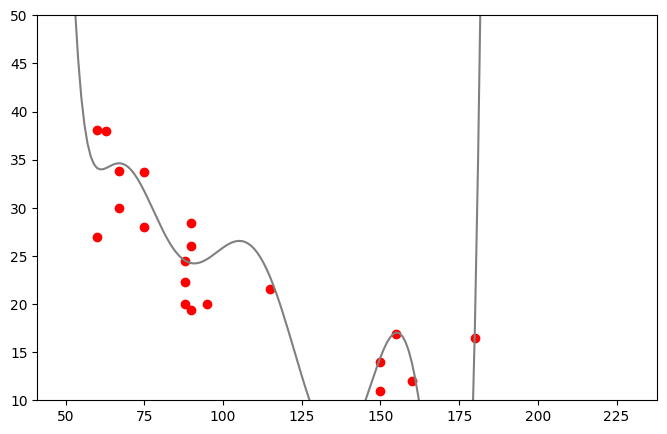

In [270]:
x_graph = np.arange(50, 230)
graph_ = PolynomialFeatures(8, include_bias=True).fit_transform(x_graph.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8, 5))

print( w)
ax.scatter(x, y, c='r')
ax.plot(x_graph, graph_ @ w, c='gray')
# ax.plot(x_graph, sum(wp[i] * x_graph ** i for i in range(len(wp))), c='blue')


# ax.set_xlim(-4.5, 4.5)
ax.set_ylim(10, 50)

plt.show()

<Axes: xlabel='horsepower', ylabel='mpg'>

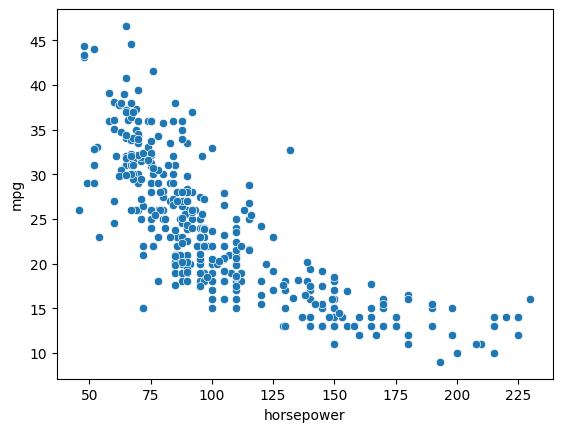

In [28]:
sns.scatterplot(x='horsepower', y='mpg', data=df)

In [47]:
poly = PolynomialFeatures(, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

c:\Users\eu21052\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_polynomial.py:554: RuntimeWarning: overflow encountered in multiply
  np.multiply(


array([[1.300000e+02, 1.690000e+04, 2.197000e+06, ...,          inf,
                 inf,          inf],
       [1.650000e+02, 2.722500e+04, 4.492125e+06, ...,          inf,
                 inf,          inf],
       [1.500000e+02, 2.250000e+04, 3.375000e+06, ...,          inf,
                 inf,          inf],
       ...,
       [8.400000e+01, 7.056000e+03, 5.927040e+05, ...,          inf,
                 inf,          inf],
       [7.900000e+01, 6.241000e+03, 4.930390e+05, ...,          inf,
                 inf,          inf],
       [8.200000e+01, 6.724000e+03, 5.513680e+05, ...,          inf,
                 inf,          inf]])

In [46]:
model = LinearRegression()
model.fit(X_poly, y)
print(model.coef_, np.linalg.norm(model.coef_))

[-3.91778126e-41 -8.17145758e-24 -1.12121756e-27  3.57806316e-31
 -1.65543598e-32 -1.75578209e-30 -1.79044234e-28 -1.64845137e-26
 -1.30783164e-24 -8.12098907e-23 -3.04552638e-21  5.93385703e-23
 -4.33338195e-25  1.40499455e-27 -1.70566899e-30] 3.04719800599088e-21


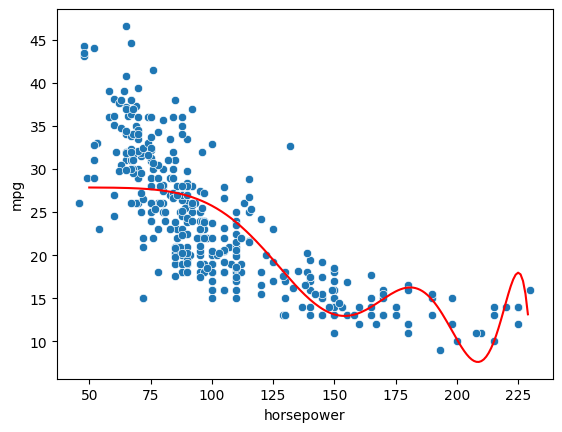

In [45]:
x = np.arange(50, 230).reshape(-1, 1)
x_ = poly.fit_transform(x)
pred_ = model.predict(x_)

sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.plot(x, pred_, 'r')

plt.show()

In [31]:
W = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y


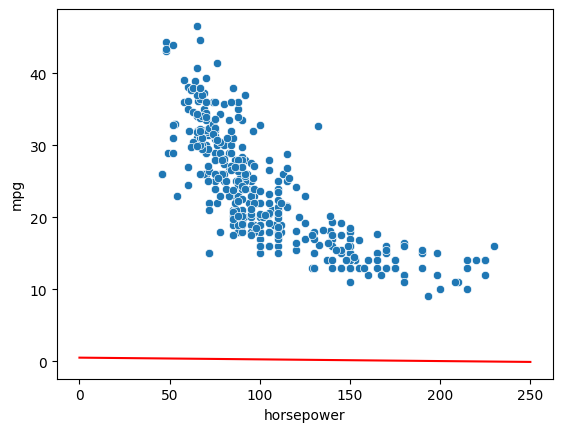

In [36]:
x_graph = np.linspace(0, 250)
y_pred = sum(W[i] * x_graph ** i for i in range(len(W)))

sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.plot(x_graph, y_pred, color='red')
plt.show()

In [ ]:
np.random.seed(0)
X = np.array(np.linspace(-3, 1, 10))
# X = np.array([-3, -2.9, -2.8, -2.65, 0, 0.75, 0,85, 0.9, 1.2, 1.25, 1.35, 1.4,  1.5, 2.25, 3.])
# y = np.array(np.exp(X) + 2 * np.random.normal(0, 1, 4))
y = np.array(X ** 2 + np.random.normal(0, 1, 10))

train_x = np.array([[X[i] ** j for j in range(9)] for i in range(len(X))])

W = np.linalg.inv(train_x.T @ train_x) @ train_x.T @ y

x_graph = np.linspace(-4.5, 4.5)
graph_ = PolynomialFeatures(8, include_bias=True).fit_transform(x_graph.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8, 5))
plt.rcParams['mathtext.fontset'] = 'cm'

ax.scatter(X, y, c='red')
ax.plot(x_graph, graph_ @ W, c='blue')

ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-5, 10)

ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
plt.show()
print(np.linalg.norm(W), W)
print(train_x)

np.set_printoptions(precision=3, linewidth=180)
for d in range(2, 10):
    train_x = np.array([[X[i] ** j for j in range(d)] for i in range(len(X))])
    w = np.linalg.inv(train_x.T @ train_x) @ train_x.T @ y
    print(f'次数：{d-1} |w|={np.linalg.norm(w):2f}, w = {w}')